In [1]:
# Most of this code is copied from
# https://www.youtube.com/watch?v=f73ItMWO4z8

import argparse
from matplotlib.pyplot import figure
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph_pair(token1, token2):
    pass

In [9]:
filename = "/Users/kevincai/Library/Mobile Documents/com~apple~CloudDocs/Career/CV/DeFi_Trading/DeFi-CeFi/TradingAlgorithm/data/combined/4HOUR_BTCUSDT_ETHUSDT_ETCUSDT_LTCUSDT__combined.csv"

df = pd.read_csv(f"{filename}")

corr_matrix = df.corr()
print(corr_matrix)

graph_pair("ETHUSDT", "BTCUSDT")

                   Date  BTCUSDT Close  ETHUSDT Close  ETCUSDT Close  \
Date           1.000000      -0.741056      -0.364327      -0.296093   
BTCUSDT Close -0.741056       1.000000       0.778910       0.436594   
ETHUSDT Close -0.364327       0.778910       1.000000       0.694608   
ETCUSDT Close -0.296093       0.436594       0.694608       1.000000   
LTCUSDT Close -0.763671       0.872739       0.623565       0.537499   

               LTCUSDT Close  
Date               -0.763671  
BTCUSDT Close       0.872739  
ETHUSDT Close       0.623565  
ETCUSDT Close       0.537499  
LTCUSDT Close       1.000000  


In [14]:
figure(figsize=(8,6), dpi = 200)
ETH_MEAN = df["ETHUSDT Close"].mean()
BTC_MEAN = df["BTCUSDT Close"].mean()
ETH = df["ETHUSDT Close"]
BTC = df["BTCUSDT Close"] * (ETH_MEAN / BTC_MEAN)

<Figure size 1600x1200 with 0 Axes>

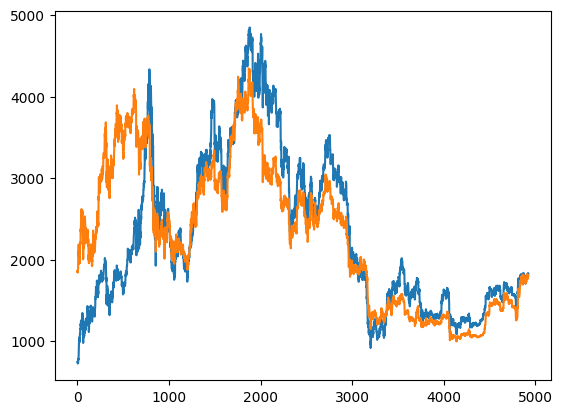

In [5]:
plt.plot(ETH, label = "ETH")
plt.plot(BTC, label = "BTC")

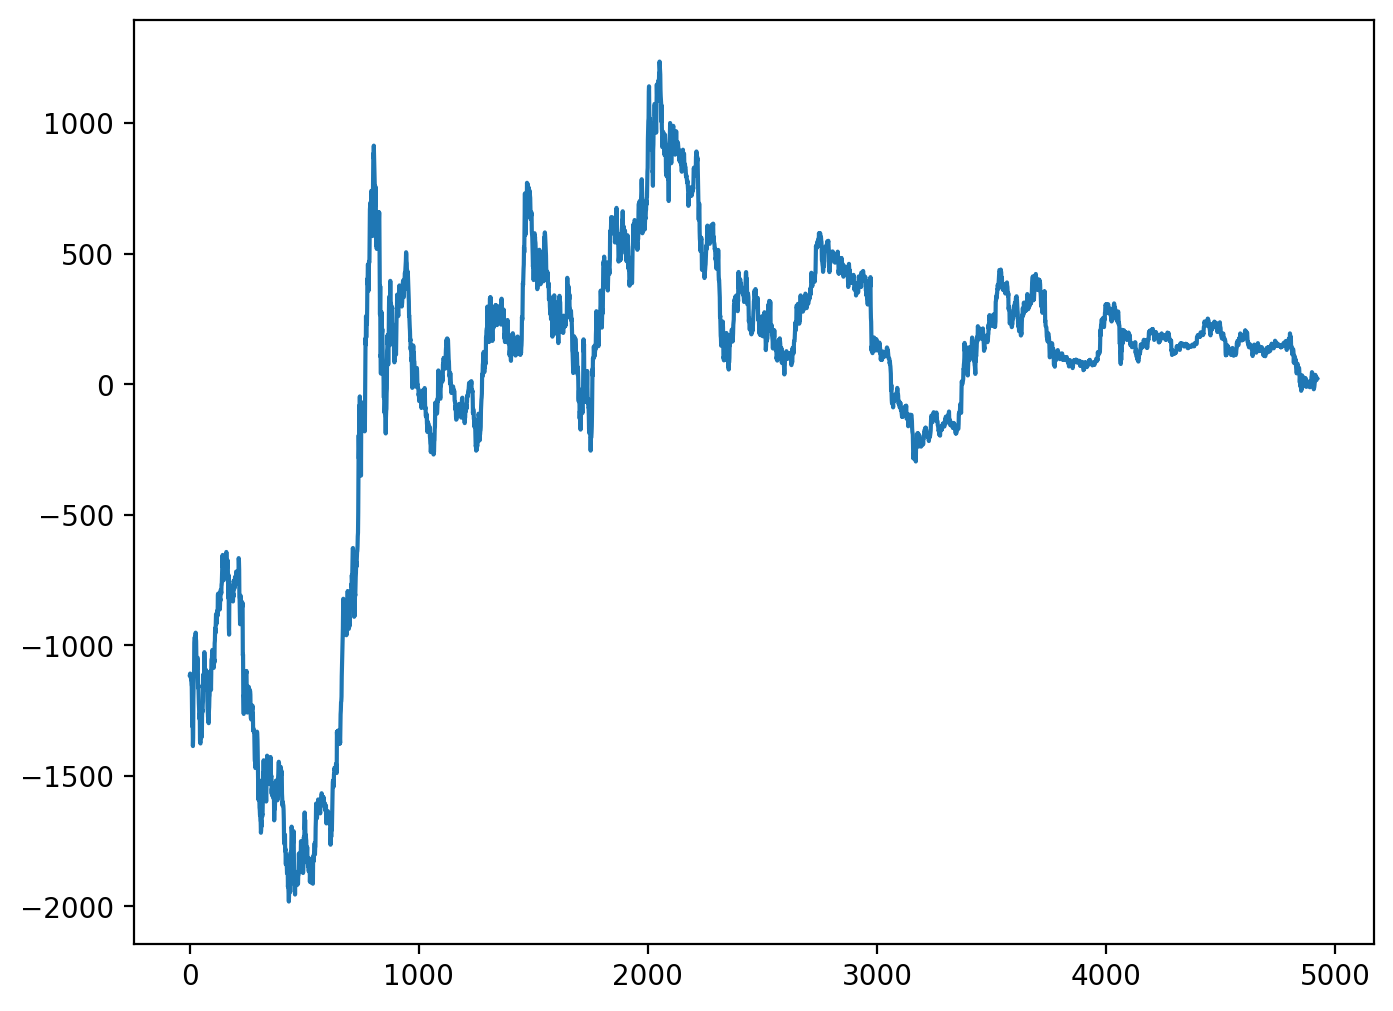

In [6]:
figure(figsize=(8,6), dpi = 200)
plt.plot(ETH-BTC, label="Spread ETH, BTC")

In [7]:
import statsmodels.tsa.stattools as ts
result = ts.coint(ETH, BTC)

ModuleNotFoundError: No module named 'statsmodels'

In [12]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print(p_val)

NameError: name 'result' is not defined

In [59]:
from statsmodels.tsa.stattools import adfuller

ETH_ADF = adfuller(ETH)
print(f"ETH ADF: {ETH_ADF[1]}")
print("\n")
BTC_ADF = adfuller(BTC)
print(f"BTC ADF: {BTC_ADF[1]}")
print("\n")
RATIO_ADF = adfuller(ETH/BTC)
print(f"RATIO ADF: {RATIO_ADF[1]}")
print("\n")
SPREAD_ADF = adfuller(ETH - BTC)
print(f"SPREAD ADF: {SPREAD_ADF[1]}")
print("\n")

ETH ADF: 0.10881123703640516


BTC ADF: 0.5056131228683162


RATIO ADF: 0.07400981290927867


SPREAD ADF: 0.02053588471641059




Text(0.5, 1.0, 'Price Ratio between ETH and BTC')

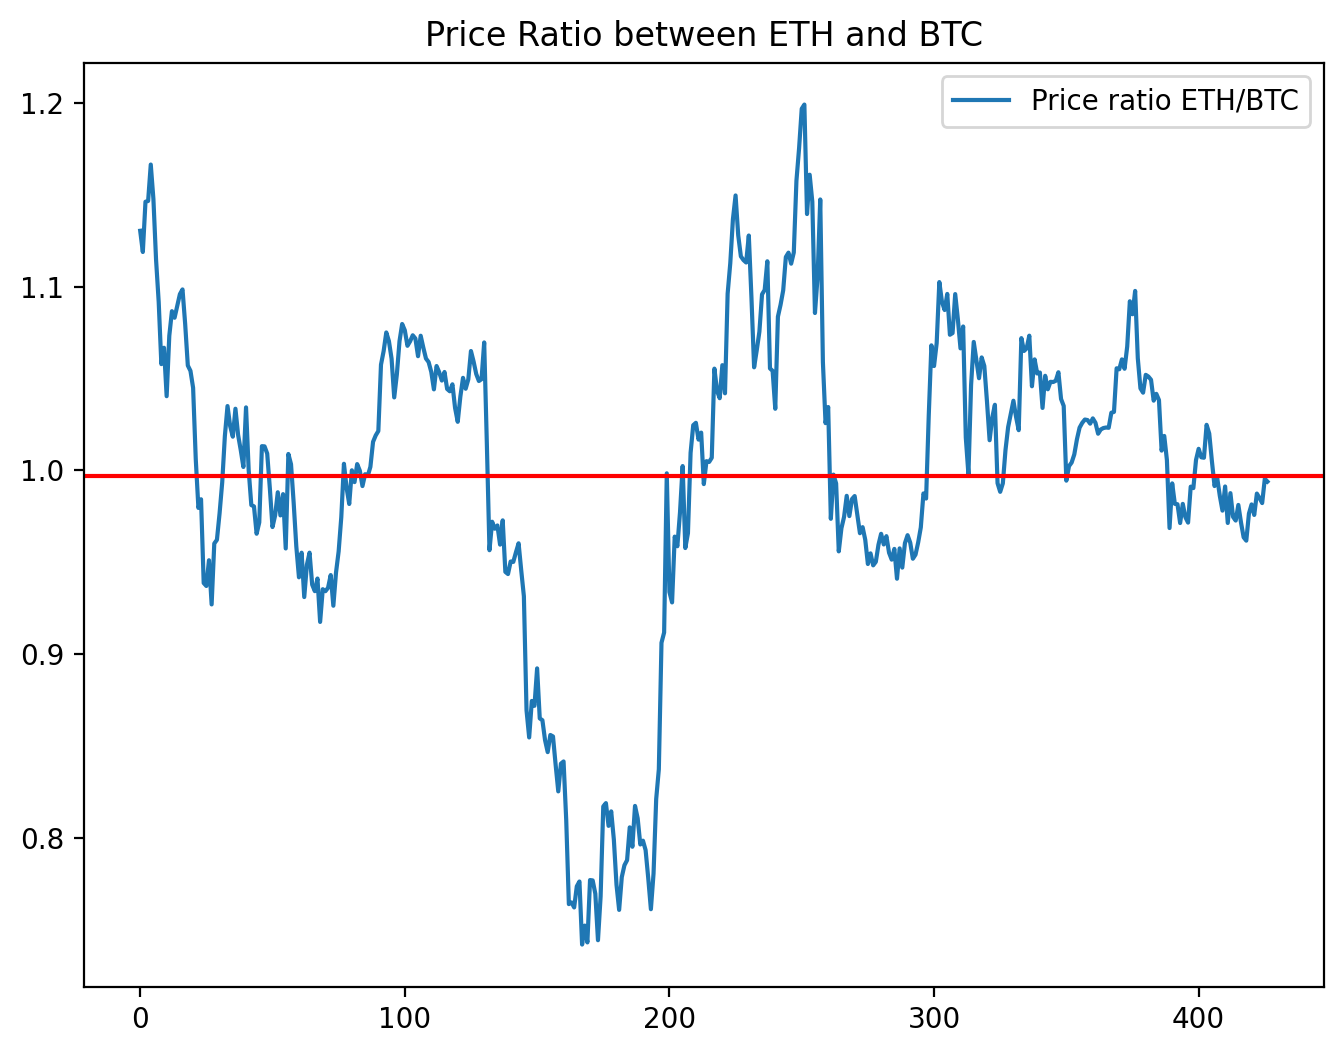

In [60]:
# price ratios

figure(figsize=(8,6), dpi = 200)
ratio = ETH / BTC
plt.plot(ratio, label = "Price ratio ETH/BTC")
plt.axhline(ratio.mean(), color = "red")
plt.legend()
plt.title("Price Ratio between ETH and BTC")

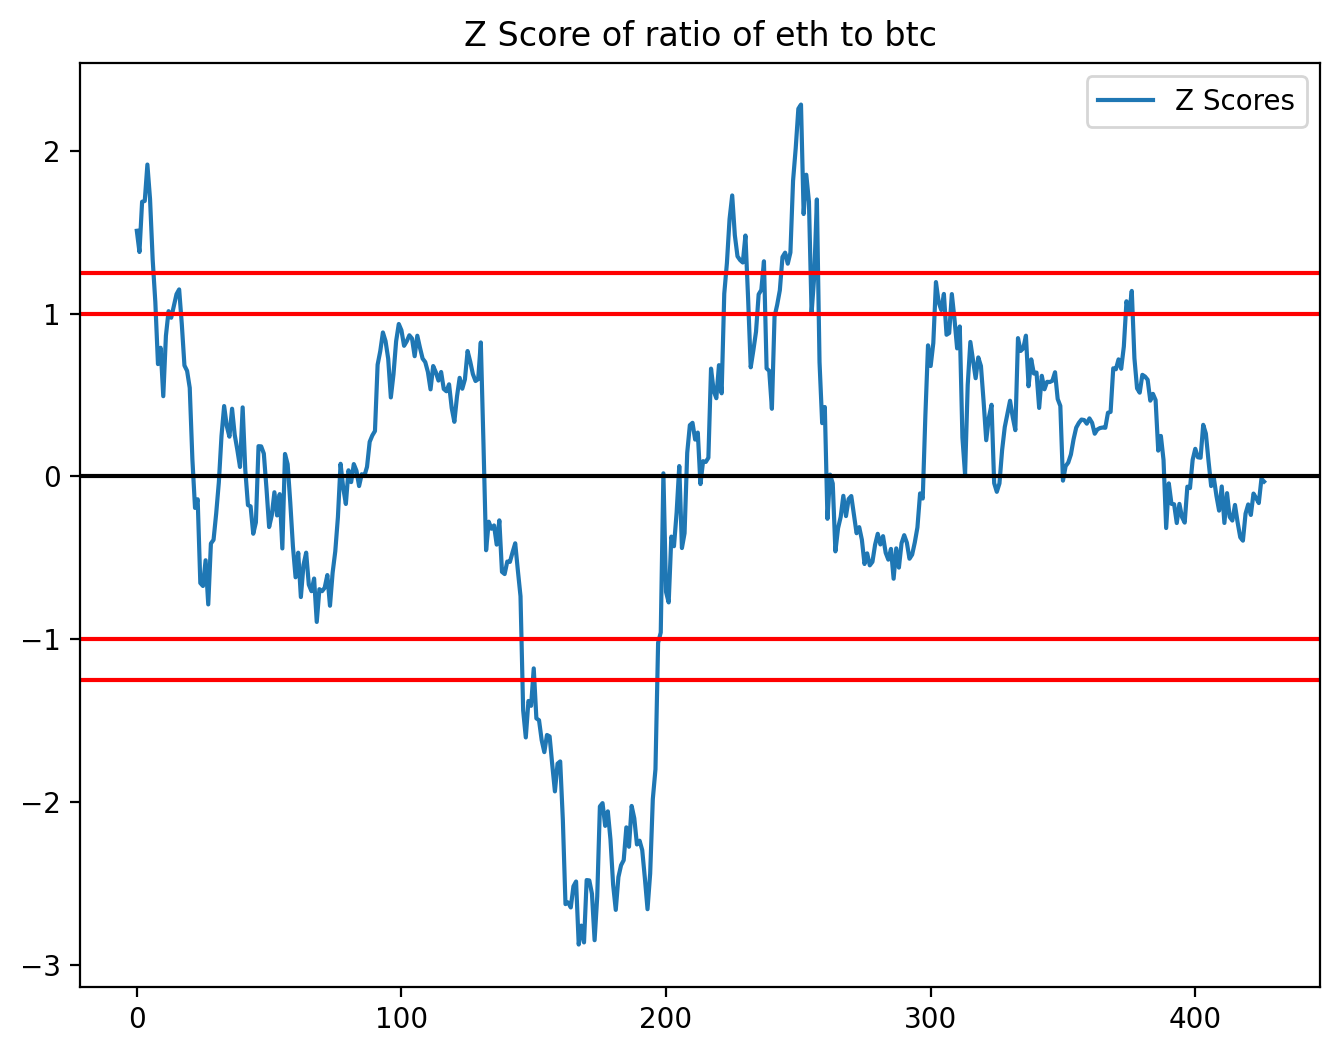

In [61]:
figure(figsize=(8,6), dpi=200)
# calculate z scores of each row
df_zscore=(ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label="Z Scores")
plt.axhline(df_zscore.mean(), color = "black")

plt.axhline(1, color = "red")
plt.axhline(1.25, color = "red")
plt.axhline(-1, color = "red")
plt.axhline(-1.25, color = "red")
plt.legend(loc = "best")
plt.title("Z Score of ratio of eth to btc")
plt.show()

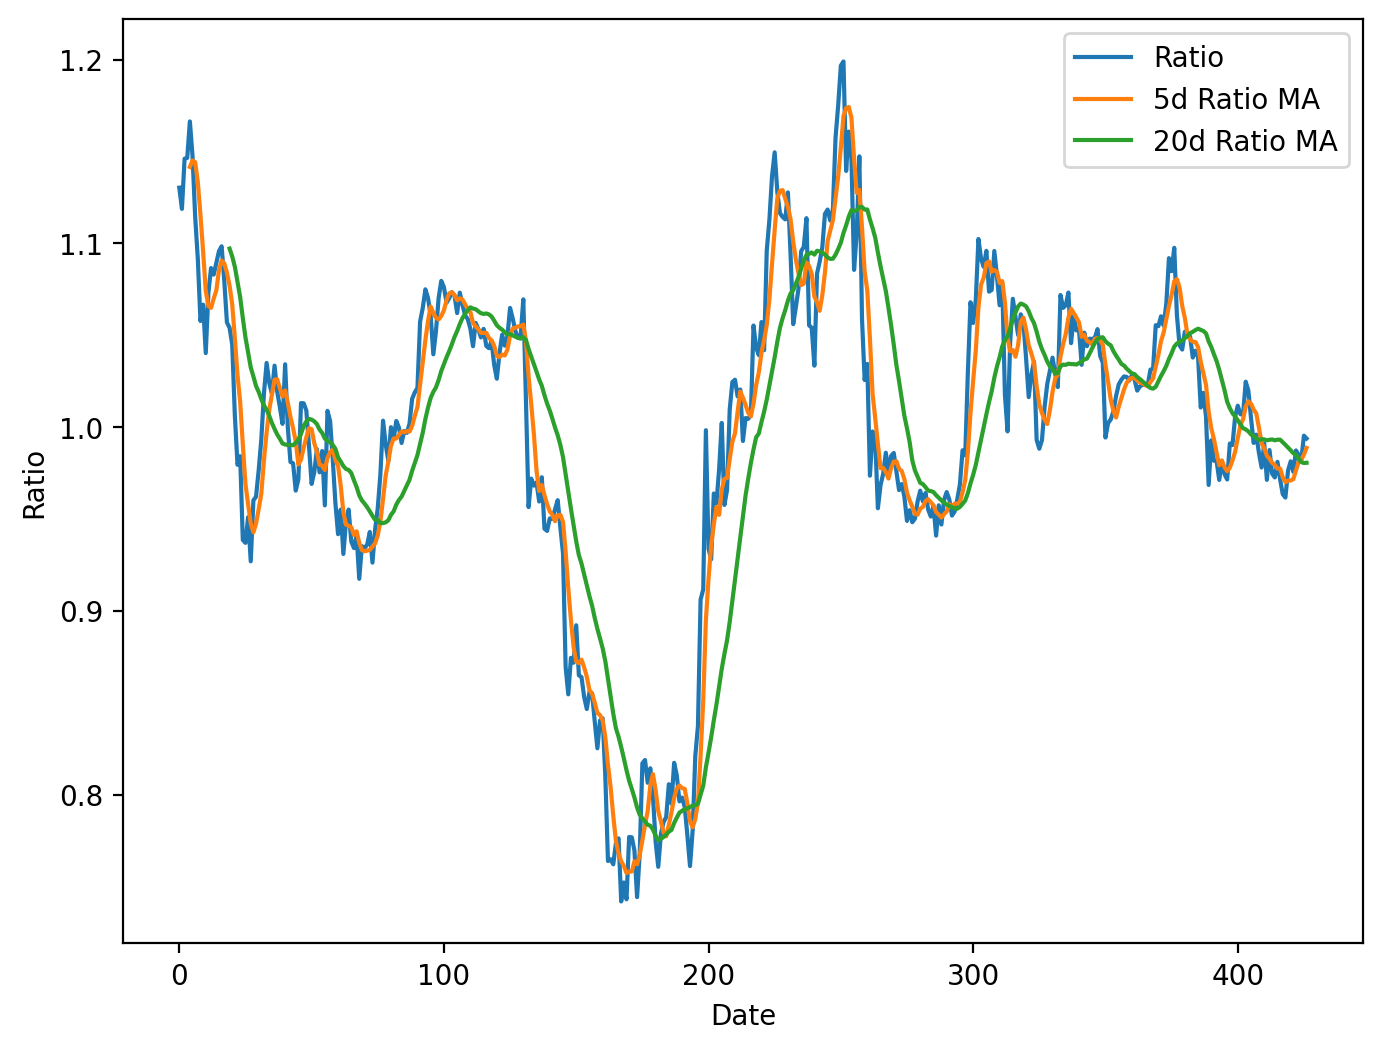

In [65]:
figure(figsize=(8,6), dpi = 200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).mean()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(["Ratio", "5d Ratio MA", "20d Ratio MA"])
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.show()

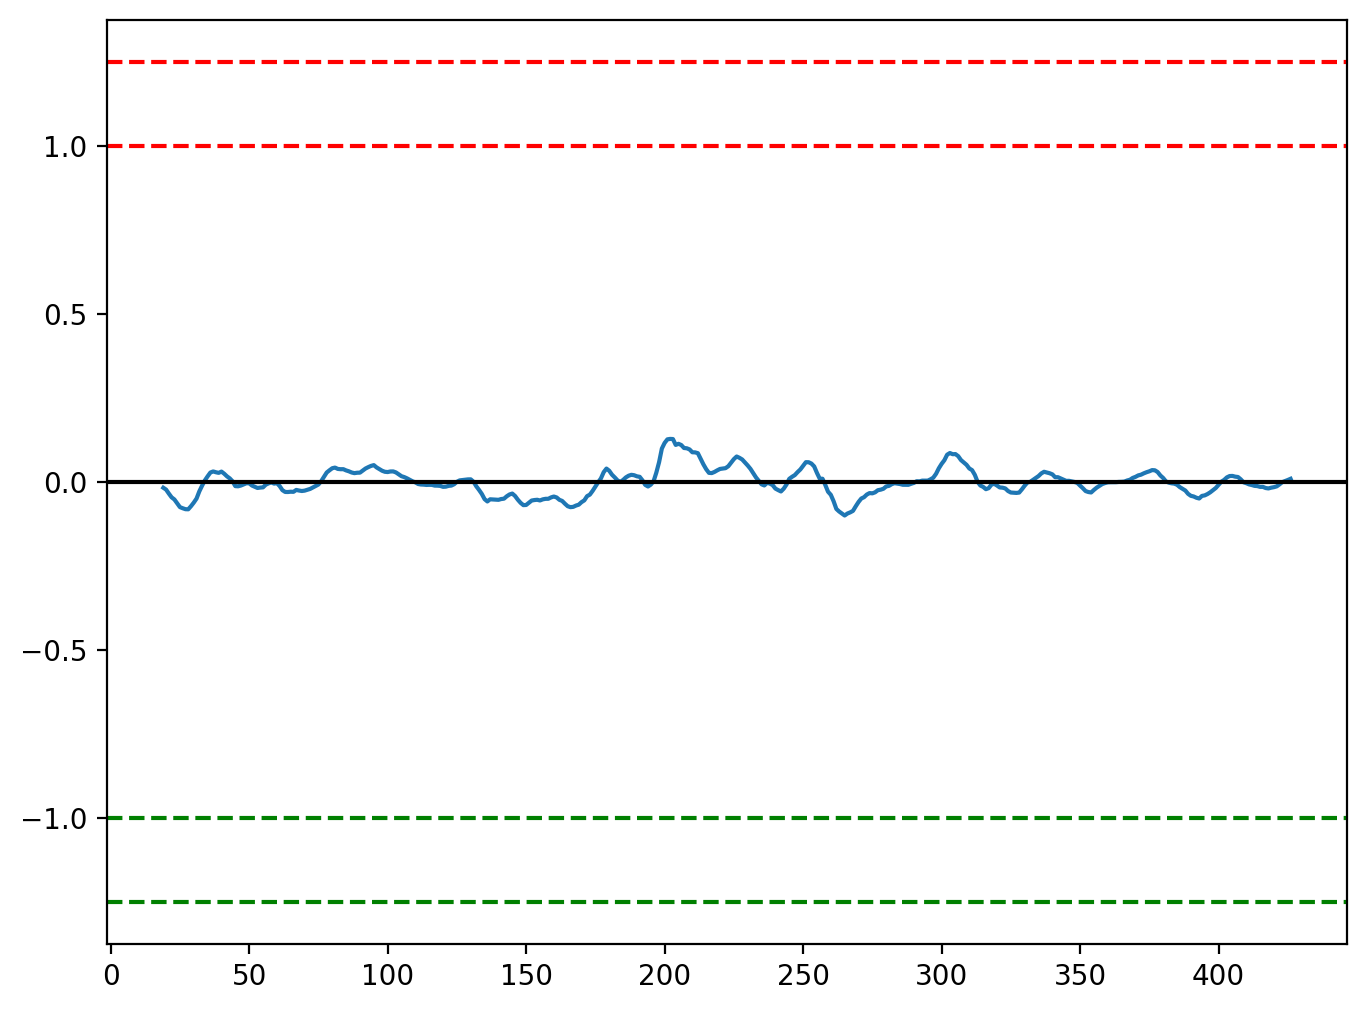

In [67]:
figure(figsize=(8,6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color = "black")
plt.axhline(1, color = "red", linestyle="--")
plt.axhline(1.25, color = "red", linestyle="--")
plt.axhline(-1, color = "green", linestyle="--")
plt.axhline(-1.25, color = "green", linestyle="--")
plt.show()

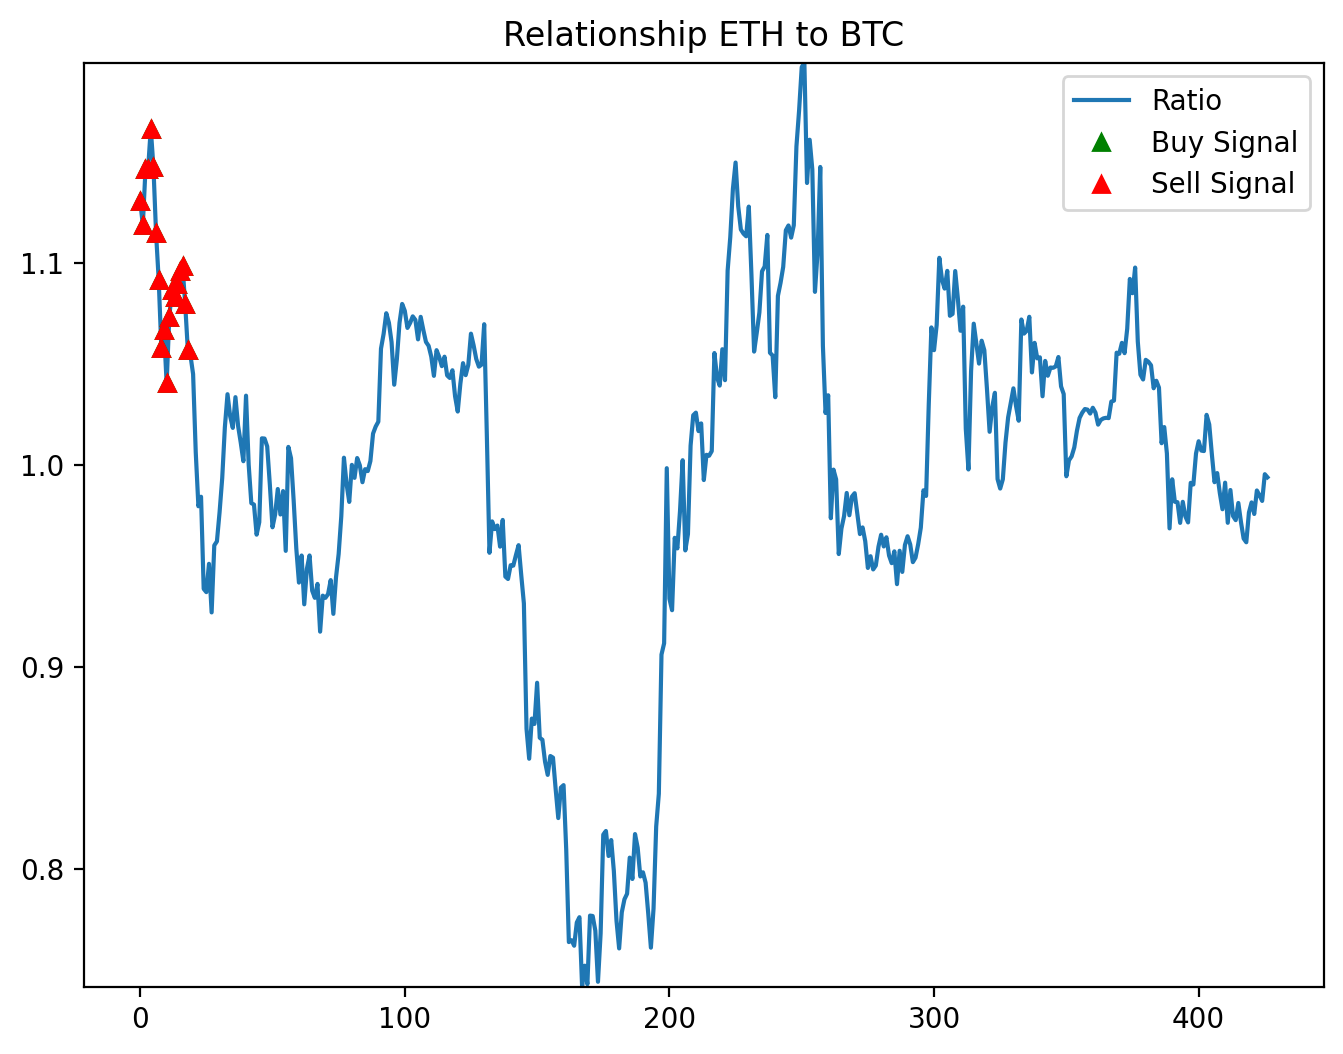

In [70]:
figure(figsize=(8,6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color="g", linestyle='None', marker="^")
sell.plot(color="r", linestyle='None', marker="^")
x1, x2, y1, y2 = plt.axis()
plt.axis([x1, x2, ratio.min(), ratio.max()])
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship ETH to BTC')
plt.show()

In [20]:
df = pd.read_csv('/Users/kevincai/Library/Mobile Documents/com~apple~CloudDocs/Career/CV/DeFi_Trading/DeFi-CeFi/TradingAlgorithm/data/separate/4HOUR_BTC.csv')
df['Close'].mean()

27209.388165041782